**Nama : Rafa Fadil Aras**

**Kelas : TI-3G**

**NIM : 2341720007**

## **Tugas Praktikum**

### **Langkah 1 - Import Library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Langkah 2 - Mengimpor dataset**



In [ ]:
data = pd.read_csv('insurance.csv')

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### **Langkah 3 - Pemahaman terhadap data**

In [ ]:
# melihat beberapa data awal
data.head()

# mengecek ukuran data
data.shape

# informasi tentang data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### **Langkah 4 - Identifikasi variabel yang  akan digunakan sebagai variabel bebas (fitur) dan variabel target**

In [ ]:
X = data.drop('charges', axis=1) # Variabel bebas (semua kolom kecuali 'charges')
y = data['charges'] # Variabel target ('charges')
print(X.head())
print(y.head())

   age     sex     bmi  children smoker     region
0   19  female  27.900         0    yes  southwest
1   18    male  33.770         1     no  southeast
2   28    male  33.000         3     no  southeast
3   33    male  22.705         0     no  northwest
4   32    male  28.880         0     no  northwest
0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


### **Langkah 5 - Membagi dataset menjadi data latih (train) dan data uji (test)**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% train, 30% test

### **Langkah 6 - Melakukan feature scaling**

In [ ]:
#dentifikasi kolom kategorikal dan numerikal
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = X_train.select_dtypes(include=np.number).columns

# One-Hot Encoding untuk kolom kategorikal (apply to train and test)
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Feature Scaling untuk kolom numerikal (fit on train, transform on train and test)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("Dataset setelah preprocessing:")
print("X_train head:")
print(X_train.head())
print("\nX_test head:")
print(X_test.head())

Dataset setelah preprocessing:
X_train head:
          age       bmi  children  sex_male  smoker_yes  region_northwest  \
332  1.544465  0.103182 -0.915011     False       False              True   
355  0.481874 -0.490845 -0.915011      True       False             False   
138  1.048589  0.226660  1.560279     False       False             False   
381  1.119429  0.023923 -0.915011      True        True             False   
292 -1.005753  2.502650  0.735182      True        True             False   

     region_southeast  region_southwest  
332             False             False  
355             False              True  
138              True             False  
381             False             False  
292              True             False  

X_test head:
           age       bmi  children  sex_male  smoker_yes  region_northwest  \
764   0.411035 -0.895484  0.735182     False       False             False   
887  -0.226519 -0.087040 -0.915011     False       False              

### **Langkah 7 - Membuat model multiple linear regression menggunakan scikit-learn**

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Latih model pada data latih
model.fit(X_train, y_train)

LinearRegression()

### **Langkah 8 - Melatih model pada data latih dan melakukan prediksi pada data uji**

In [ ]:
y_pred = model.predict(X_test)

### **Langkah 9 - Evaluasi model dengan menghitung metrik**

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Hitung R-squared
r2 = r2_score(y_test, y_pred)

# Hitung MSE
mse = mean_squared_error(y_test, y_pred)

# Hitung MAE
mae = mean_absolute_error(y_test, y_pred)

# Hitung RMSE
rmse = np.sqrt(mse)

print(f"R-squared: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

R-squared: 0.7696
MSE: 33780509.5748
MAE: 4145.4506
RMSE: 5812.1003


### **Langkah 10 - Visualisasi data**

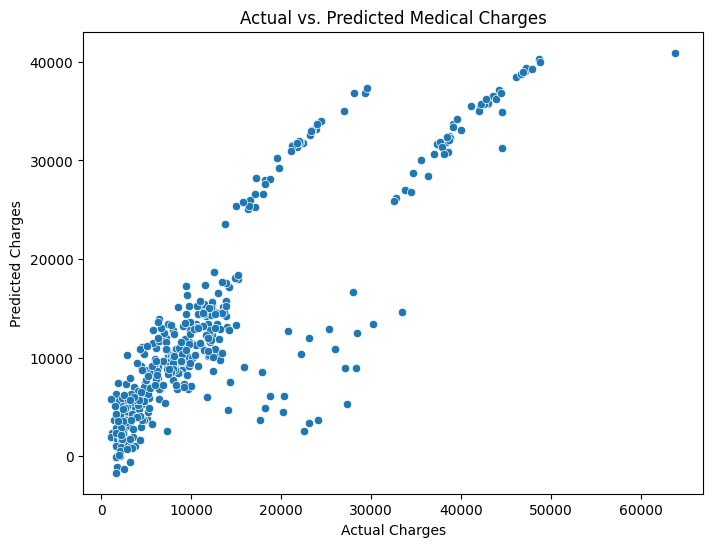

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Medical Charges")
plt.show()

### **Analisis**

Tujuan : Membangun model regresi linear berganda untuk memprediksi variabel charges berdasarkan variabel lainnya.

- **Deskripsi Dataset**
  1. Age : Usia nasaban (numerik)
  2. Sex : Jenis kelamin nasabah (kategorikal)
  3. BMI : Body Mass Index nasabah (numerik)
  4. Children : Jumlah anak yang ditanggung nasabah (numerik)
  5. Smoker : Status merokok nasabah (kategorikal)
  6. Region : Wilayah domisili nasabah (kategorikal)
  7. Charges : Total biaya asuransi (numerik)

- **Analisis Hasil**
  Model regresi linear telah berhasil dilatih dan diuji menggunakan dataset asuransi. Evaluasi model dilakukan dengan beberapa metrik untuk mengukur performanya, yaitu
  - R-Squared : 0.7696
  - MSE : 33780509.5748
  - MAE : 4145.4506
  - RMSE : 5812.1003

  R-Squared (0.7696) menunjukkan bahwa 76.96% variasi biaya medis dapat dijelaskan oleh variabel prediktor (age, sex, BMI, children, smoker, region). Nilai ini tergolong baik dan mengindikasikan kemampuan prediksi yang kuat dalam konteks regresi biaya kesehatan.

  MAE (4,145.45) menunjukkan rata-rata error absolut sebesar $4,145. Artinya, prediksi model rata-rata meleset sekitar $4,145 dari nilai aktual, tanpa mempertimbangkan arah kesalahan (overpredict/underpredict). Nilai ini memberikan gambaran error yang lebih realistis karena tidak terpengaruh outliers.

  RMSE (5,812.10) mengindikasikan standar deviasi error sebesar $5,812. Nilai RMSE yang lebih besar dari MAE ($5,812 vs $4,145) menunjukkan adanya prediksi dengan error besar atau outliers. RMSE memberikan penalti lebih tinggi pada kesalahan besar karena mengkuadratkan error sebelum dirata-ratakan.

  MSE (33,780,509.57), meskipun tidak disebutkan sebelumnya, penting untuk dilaporkan sebagai metrik yang sensitif terhadap outliers. Nilai MSE yang besar mengkonfirmasi adanya beberapa prediksi dengan deviasi signifikan, konsisten dengan pola sebaran pada scatter plot.

- **Interpretasi Scatter Plot**

  Visualisasi menunjukkan pola linear yang jelas antara nilai aktual dan prediksi, mengkonfirmasi performa model yang baik. Namun, terdapat heteroskedastisitas (variance error meningkat pada nilai charges tinggi) dan beberapa outliers pada rentang biaya > $30,000, yang menjelaskan perbedaan antara MAE dan RMSE.

- **Kesimpulan**
  Model regresi menunjukkan performa cukup baik dengan R² tinggi dan error moderat. Namun, model kurang akurat pada kasus biaya tinggi dan masih memiliki ruang perbaikan. Rekomendasi: eksplorasi model non-linear (Random Forest, XGBoost), feature engineering (interaksi variabel seperti smoker×BMI), dan penanganan outliers untuk meningkatkan akurasi prediksi.


